# Практическое задание: Основы визуализации данных с Matplotlib
В этом задании вы создадите базовые визуализации с использованием **Matplotlib**. Вы будете практиковаться в создании линейных графиков, столбчатых диаграмм, точечных диаграмм и гистограмм, чтобы понять, как визуализация данных может помочь эффективно передавать инсайты.

---

## **Инструкции по проекту**
В каждом шаге есть инструкции, которые помогут вам понять и проанализировать графики. Попробуйте сделать аналитические резюме на каждом шаге. Шаги:
1. **Линейный график**: Визуализируйте `online` и `physical` продажи с течением времени, чтобы понять тенденции продаж.
2. **Столбчатая диаграмма**: Сравните `online` и `physical` продажи в разные дни.
3. **Точечная диаграмма**: Покажите взаимосвязь между `online` продажами и `расходами`.
4. **Гистограмма**: Проанализируйте распределение `online` и `physical` продаж.

---
### **Создание DataFrame**

Следующий код генерирует примерный набор данных для визуализации.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Установите seed для воспроизводимости
np.random.seed(42)

data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'online': np.random.randint(20, 80, size=10),
    'physical': np.random.randint(50, 100, size=10),
    'Expenses': np.random.randint(10, 30, size=10)
}
sample_data = pd.DataFrame(data)



---
## Реализация
## Шаг 1: **Отобразите основную информацию о данных**
Отобразите информацию о наборе данных и покажите первые 5 строк набора данных.



In [2]:
# Выводим первые 5 строк DataFrame
print(sample_data.head())

        Date  online  physical  Expenses
0 2023-01-01      58        72        21
1 2023-01-02      71        60        15
2 2023-01-03      48        60        11
3 2023-01-04      34        73        10
4 2023-01-05      62        85        21



## Шаг 2: **Линейный график для продаж**
- Постройте линейный график, показывающий как онлайн, так и физические магазины с течением времени.
- Создайте фигуру, установите размер фигуры `(10,5)`.
- Вычислите и постройте скользящее среднее (3-дневное окно) для обеих продаж, установите стили линий.
- Сохраните фигуру и отобразите её. **Ожидаемый результат:**

![Линейный график для продаж](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/matplotlib_basic/1.png)



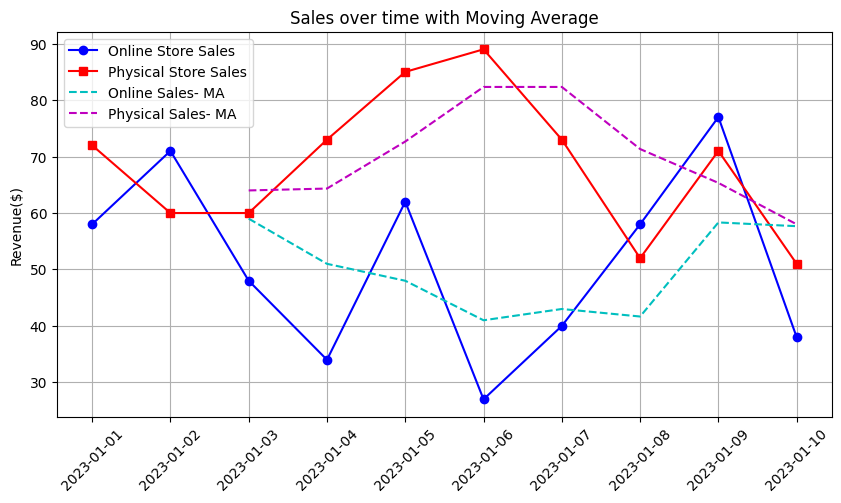

In [3]:
# Вычисляем скользящее среднее
sample_data['mean_online'] = sample_data['online'].rolling(window=3).mean()
sample_data['mean_physical'] = sample_data['physical'].rolling(window=3).mean()
# Строим график
plt.figure(figsize=(10, 5))
plt.plot(sample_data['Date'], sample_data['online'], label='Online Store Sales', marker='o', color='b')
plt.plot(sample_data['Date'], sample_data['physical'], label='Physical Store Sales', marker='s', color='r')
plt.plot(sample_data['Date'], sample_data['mean_online'], label='Online Sales- MA', linestyle='--', color='c')
plt.plot(sample_data['Date'], sample_data['mean_physical'], label='Physical Sales- MA', linestyle='--', color='m')


# Добавляем подписи к осям
plt.xticks(rotation=45)
plt.ylabel('Revenue($)')
plt.title('Sales over time with Moving Average')
plt.legend()
plt.grid(True)

# Сохраняем график
plt.savefig('sales.png')
# Отображаем график
plt.show()



---

## Шаг 3: **Группированная столбчатая диаграмма для сравнения продаж**
- Сравните ежедневные продажи онлайн и физических магазинов.
- Установите ширину столбцов `0.35`, и размер фигуры `(10,5)`.
- Постройте столбцы для онлайн-продаж, сдвиньте позицию `влево` на `width/2`.
- Постройте столбцы для физических продаж, сдвиньте позицию `вправо` на `width/2`.
- Сохраните фигуру как `bar_chart.png` и отобразите её.
**Совет:** Линии сетки на оси y улучшают читаемость. 
**Ожидаемый результат:**

![Столбчатая диаграмма для сравнения продаж](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/matplotlib_basic/2.png)



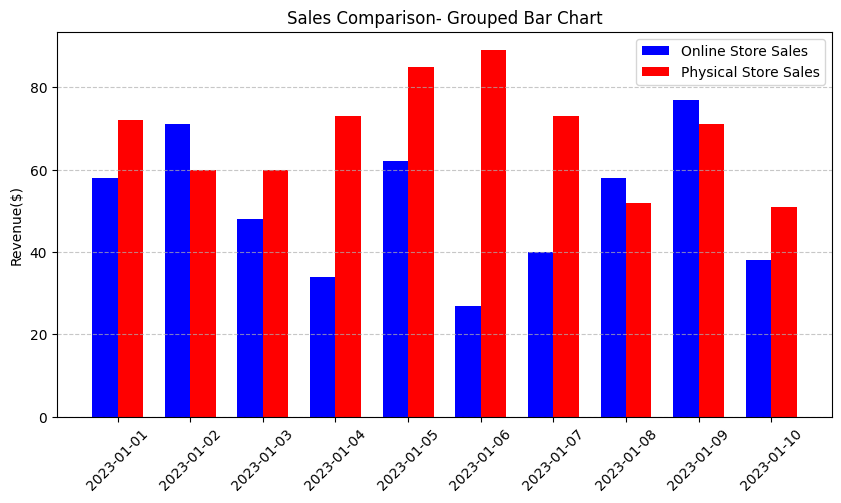

In [57]:
# Строим сравнительный график продаж
plt.figure(figsize=(10, 5))
width = 0.35
plt.bar(sample_data['Date']-pd.Timedelta(days=width/2), sample_data['online'], width, label='Online Store Sales', color='b')
plt.bar(sample_data['Date']+pd.Timedelta(days=width/2), sample_data['physical'], width, label='Physical Store Sales', color='r')
 
# Добавляем подписи к осям
plt.xticks(rotation=45)
plt.ylabel('Revenue($)')
plt.title('Sales Comparison- Grouped Bar Chart')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Сохраняем график
plt.savefig('bar_chart.png')


---

## Шаг 4: **Точечная диаграмма для продаж и расходов**
- Проанализируйте взаимосвязь между онлайн-продажами и расходами.
- Установите размер фигуры `(8,5)`.
- Добавьте заголовок: Точечная диаграмма онлайн-продаж и расходов.
- Сохраните фигуру, а затем отобразите её.
**Совет:** Ищите **корреляцию** — увеличиваются ли расходы, когда увеличиваются онлайн-продажи?
**Ожидаемый результат:**

![Точечная диаграмма для продаж и расходов](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/matplotlib_basic/3.png)



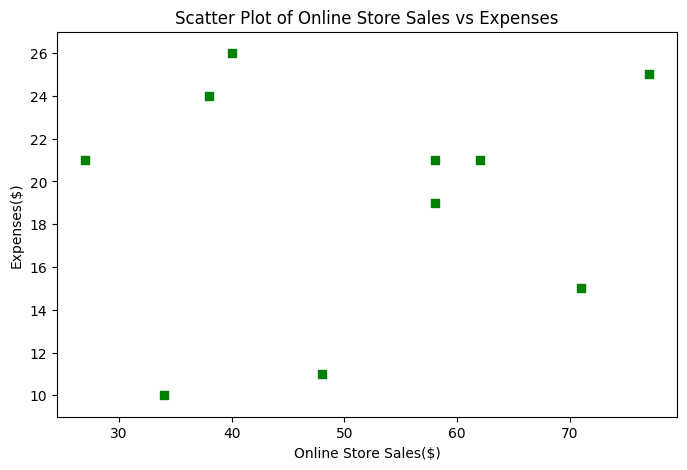

In [54]:
# Находим корреляцию между продажами в онлайн-магазине и физическом магазине
correlation = sample_data['online'].corr(sample_data['Expenses'])
# Cоздаем точечный график
plt.figure(figsize=(8, 5))
plt.scatter(sample_data['online'], sample_data['Expenses'], color='g', marker='s')
# Шаг оси у
plt.yticks(np.arange(10,27,2))
plt.ylim(9, 27)
# Добавляем подписи к осям
plt.xlabel('Online Store Sales($)')
plt.ylabel('Expenses($)')
plt.title('Scatter Plot of Online Store Sales vs Expenses')

# Сохраняем график
plt.savefig('scatter_plot.png')





---

## Шаг 5: **Гистограмма для распределения продаж**
- Отобразите распределение онлайн и физических магазинов.
- Установите размер фигуры `(10,5)`.
- Подпишите ось x как `Доход ($)` и ось y как `Частота`.
- Сохраните фигуру и отобразите её.
- Выведите сообщение о подтверждении, что графики были успешно сохранены.
**Совет:** Попробуйте изменить значение `bins` (например, `bins=10`), чтобы увидеть больше деталей.
**Ожидаемый результат:**

![Гистограмма для распределения продаж](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/matplotlib_basic/4.png)



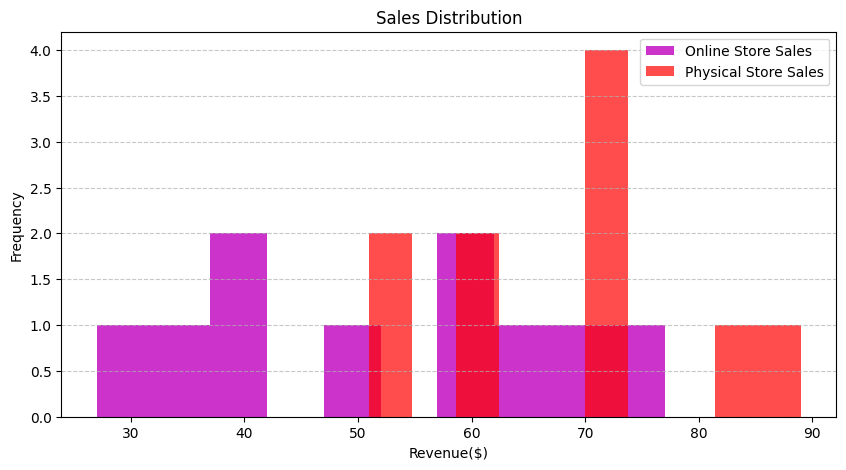

In [53]:
# Создаем гистограмму
plt.figure(figsize=(10, 5))
plt.hist(sample_data['online'], bins=10, color='m',label='Online Store Sales', alpha=0.8)
plt.hist(sample_data['physical'], bins=10, color='red',label='Physical Store Sales', alpha=0.7)
plt.xlabel('Revenue($)')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Сохраняем график
plt.savefig('histogram.pdf')


---
## **Дополнительные задачи (для практики!)**
- Измените цвета и стили графиков.
- Экспериментируйте с разными размерами бинов в гистограмме.
- Попробуйте сохранить графики в разных форматах (например, `plt.savefig("chart.pdf")`).

---
### Как отправить проект

1. Создайте файл Jupyter Notebook на вашем Google Диске.
2. Напишите ваше решение в ноутбуке.
3. Поделитесь доступом с вашим наставником (или предоставьте ссылку с правами на редактирование).
4. Отправьте ссылку на файл ноутбука.


# Резюме
Этот проект улучшает навыки работы с **Matplotlib** путем визуализации различных аспектов данных о продажах, помогая понять тенденции, сравнения и распределения!